Chapter 4 question 10 

In [87]:

## perform imports and set-up
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from scipy import stats

%matplotlib inline
plt.style.use('ggplot') 


np.set_printoptions(precision=4)

In [88]:
df = pd.read_csv('data/Weekly.csv')

In [89]:
df.head()
# Compute correlation coeffecient matrix
correlations = df.corr(method='pearson')
print(correlations)

            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519  0.841942   
Lag1   -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183 -0.064951   
Lag2   -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499 -0.085513   
Lag3   -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657 -0.069288   
Lag4   -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675 -0.061075   
Lag5   -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000 -0.058517   
Volume  0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517  1.000000   
Today  -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013 -0.033078   

           Today  
Year   -0.032460  
Lag1   -0.075032  
Lag2    0.059167  
Lag3   -0.071244  
Lag4   -0.007826  
Lag5    0.011013  
Volume -0.033078  
Today   1.000000  


question 10 (a)
Answer: Answer: 
The strongest correlation is between year and volume. The Today's return value is weakly correlated with lag1, lag2 and lag3.  Therefore,  our models do not perform exceedingly well because the is little relationship between the predictors and response.

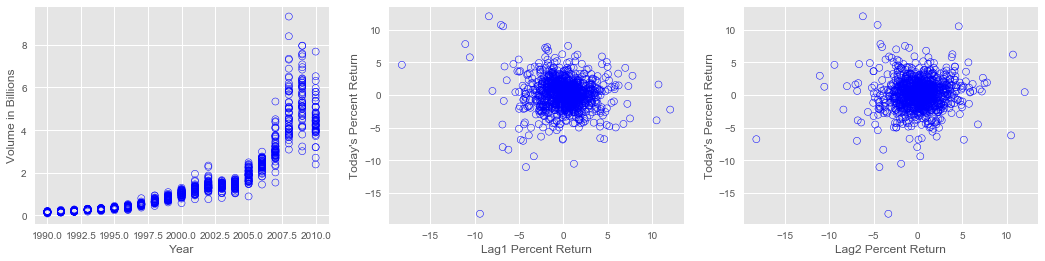

In [90]:
# Plot the Trading Volume vs. Year
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4));

ax1.scatter(df.Year.values,df.Volume.values, facecolors='none', edgecolors='b');
ax1.set_xlabel('Year');
ax1.set_ylabel('Volume in Billions');

# Plot Lag1 vs Today's return
ax2.scatter(df.Lag1.values, df.Today.values, facecolors='none', edgecolors='b' );
ax2.set_xlabel('Lag1 Percent Return');
ax2.set_ylabel('Today\'s Percent Return');

# Plot Lag1 vs Today's return
ax3.scatter(df.Lag2.values, df.Today.values, facecolors='none', edgecolors='b' );
ax3.set_xlabel('Lag2 Percent Return');
ax3.set_ylabel('Today\'s Percent Return');

question 10 (b)
Answer: Lag2 seems to be a predictor with statistical significance. We can say that because Lag2 has a small P|z|, meaning that there's a small probability that Lag2 coefficient is equal to zero.



In [91]:

# Construct Design Matrix #
###########################
predictors = df.columns[1:7] # the lags and volume
X = sm.add_constant(df[predictors])

# Convert the Direction to Binary #
###################################
y = np.array([1 if el=='Up' else 0 for el in df.Direction.values])

# Construct the logit model #
###########################
logit = sm.Logit(y,X)
results=logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Tue, 27 Feb 2018   Pseudo R-squ.:                0.006580
Time:                        10:57:27   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

question 10 (c)
Answer: 

For precision,  the probability the market does increase on days when the model predicts the market to increase, is 557/(430+557) of 56%.

For type I error,  the probability that we have predicted the market to increase and it does not increase is 430/(430+54) = 89%

For type II error, which is the number of false negatives to all positives, is 48/(557+48)= 8%

The sensitivity is 92%. The model is sensitive to catch all true positives, but a high false positive rate is also incurred. Inverse relationship between Type I and Type II errors exist.

In [92]:
# Get the predicted results for the full dataset
y_predicted = results.predict(X)
#conver the predicted probabilities to a class
y_predicted= np.array(y_predicted > 0.5, dtype=float)

# Build Confusion Matrix #
##########################
table = np.histogram2d(y_predicted, y, bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

       Down     Up
Down   54.0   48.0
Up    430.0  557.0


Error Rate = 0.438934802571


question 10 (d)

In [93]:
# Split Data #
##############
# get the Lag2 values for years less than =  2008
X_train = sm.add_constant(df[df.Year <= 2008].Lag2)
response_train = df[df.Year <= 2008].Direction
# convert responses to 0,1's
y_train = np.array([1 if el=='Up' else 0 for el in response_train])

# for the test set use the years > 2008
X_test = sm.add_constant(df[df.Year > 2008].Lag2)
response_test = df[df.Year > 2008].Direction
y_test = np.array([1 if el=='Up' else 0 for el in response_test])

# Construct Classifier and Fit #
################################
logit = sm.Logit(y_train, X_train)
results = logit.fit()
print(results.summary())
print('\n')

# Predict Test Set Responses #
##############################
y_predicted = results.predict(X_test)
#conver the predicted probabilities to a class
y_predicted= np.array(y_predicted > 0.5, dtype=float)

# Build Confusion Matrix #
##########################
table = np.histogram2d(y_predicted, y_test, bins=2)[0]
print('CONFUSION MATRIX')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Tue, 27 Feb 2018   Pseudo R-squ.:                0.003076
Time:                        10:58:11   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
                                        LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

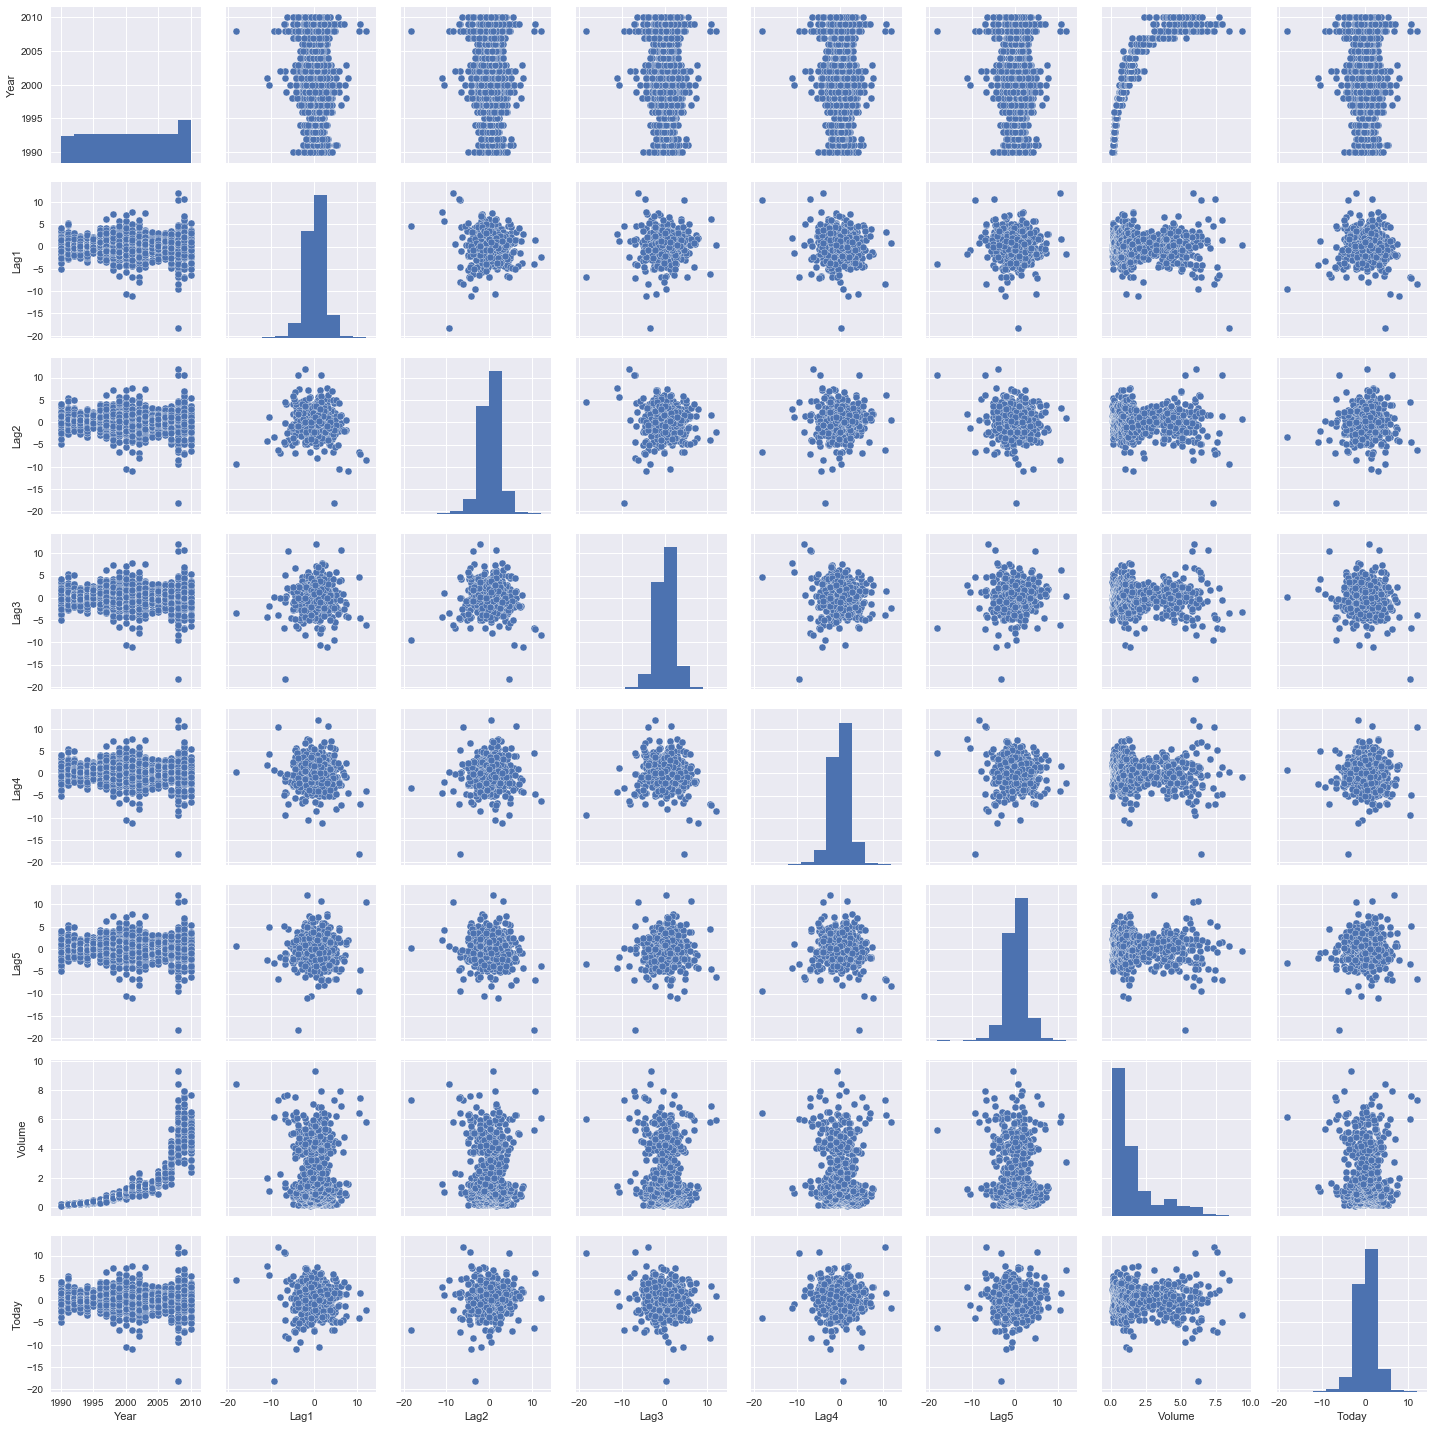

In [72]:
sns.pairplot(df);

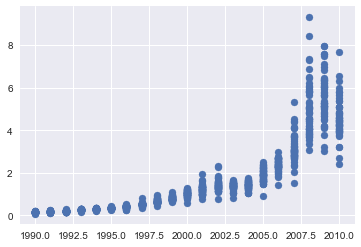

In [73]:
plt.scatter(df['Year'],df['Volume'])

question 10 (e)

In [94]:
# Create LDA Classifier and Fit #
#################################
clf = LDA(solver='lsqr', store_covariance=True)
# No constant needed for LDA so reset the X_train
X_train = df[df.Year <= 2008].Lag2.values
# reshape so indexed by two indices
X_train = X_train.reshape((len(X_train),1))

# also go ahead and get test set and responses
X_test = df[df.Year > 2008].Lag2.values
# reshape into so indexed by two indices
X_test = X_test.reshape((len(X_test),1))

clf.fit(X_train, y_train)
print('Priors = ', clf.priors_ )
print('Class Means = ', clf.means_[0], clf.means_[1])
print('Coeffecients = ', clf.coef_)
print('\n')

# Predict Test Set Responses #
##############################
y_predicted = clf.predict(X_test)
#conver the predicted probabilities to class 0 or 1
y_predicted= np.array(y_predicted > 0.5, dtype=float)

# Build Confusion Matrix #
##########################
table = np.histogram2d(y_predicted, y_test, bins=2)[0]
print('CONFUSION MATRIX')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

Priors =  [ 0.4477  0.5523]
Class Means =  [-0.0357] [ 0.2604]
Coeffecients =  [[ 0.0578]]


CONFUSION MATRIX
      Down    Up
Down   9.0   5.0
Up    34.0  56.0


Error Rate = 0.375


question 10 (f)

In [95]:
# Build Classifier and Fit #
############################
qclf = QDA(store_covariances=True)
qclf.fit(X_train,y_train)

print('Priors = ', qclf.priors_ )
print('Class Means = ', qclf.means_[0], qclf.means_[1])
print('Covariances = ', qclf.covariances_)
print('\n')

# Predict Test Set Responses #
##############################
y_predict = qclf.predict(X_test)
#conver the predicted probabilities to class 0 or 1
y_predicted= np.array(y_predict > 0.5, dtype=float)

# Build Confusion Matrix #
##########################
table = np.histogram2d(y_predict, y_test, bins=2)[0]
print('CONFUSION MATRIX')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))



Priors =  [ 0.4477  0.5523]
Class Means =  [-0.0357] [ 0.2604]
Covariances =  [array([[ 4.8378]]), array([[ 5.3707]])]


CONFUSION MATRIX
      Down    Up
Down   0.0   0.0
Up    43.0  61.0


Error Rate = 0.413461538462


/Users/lukwingsan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:664: DeprecationWarning: 'store_covariances' was renamed to store_covariance in version 0.19 and will be removed in 0.21.
  DeprecationWarning)
/Users/lukwingsan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function covariances_ is deprecated; Attribute covariances_ was deprecated in version 0.19 and will be removed in 0.21. Use covariance_ instead
  warnings.warn(msg, category=DeprecationWarning)


In [76]:
mod.coef_

array([[-0.04117292,  0.05846974, -0.01599122, -0.02769998, -0.01440289,
        -0.02212844]])

question 10 (g)

In [96]:
# Build KNN Classifier and Fit #
################################
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

# Predict Test Set Responses #
##############################
y_predicted = clf.predict(X_test)

table = np.histogram2d(y_predicted, y_test , bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

      Down    Up
Down  21.0  31.0
Up    22.0  30.0

Error Rate = 0.509615384615


question 10 (h)
Answer: Best models are LDA and logistic models with lowest error rate.

In [97]:
# Build KNN Classifier and Fit #
################################
clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(X_train, y_train)

# Predict Test Set Responses #
##############################
y_predicted = clf.predict(X_test)

table = np.histogram2d(y_predicted, y_test , bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

      Down    Up
Down  23.0  22.0
Up    20.0  39.0

Error Rate = 0.403846153846


question 10 (i)
Answer: From trials below, no improvements are found, the best model is still the logistic or LDA model. 

In [98]:
# Split Data #
##############
predictors = df.columns[1:4]
X_train = sm.add_constant(df[df.Year <= 2008][predictors])
response_train = df[df.Year <= 2008].Direction
# convert responses to 0,1's
y_train = np.array([1 if el=='Up' else 0 for el in response_train])

# for the test set use the years > 2008
X_test = sm.add_constant(df[df.Year > 2008][predictors])
response_test = df[df.Year > 2008].Direction
y_test = np.array([1 if el=='Up' else 0 for el in response_test])

# Construct Classifier and Fit #
################################
logit = sm.Logit(y_train, X_train)
results = logit.fit()
print(results.summary())
print('\n')

# Predict Test Set Responses #
##############################
y_predicted = results.predict(X_test)
#conver the predicted probabilities to a class
y_predicted= np.array(y_predicted > 0.5, dtype=float)

# Build Confusion Matrix #
##########################
table = np.histogram2d(y_predicted, y_test, bins=2)[0]
print('CONFUSION MATRIX')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

Optimization terminated successfully.
         Current function value: 0.683687
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  985
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                            3
Date:                Tue, 27 Feb 2018   Pseudo R-squ.:                0.005792
Time:                        10:59:53   Log-Likelihood:                -673.43
converged:                       True   LL-Null:                       -677.35
                                        LLR p-value:                   0.04928
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2123      0.065      3.282      0.001       0.086       0.339
Lag1          -0.0537      0.

In [99]:
# Add Interaction #
###################
# add the interaction term to the dataframe
df['Lag1xLag2'] = pd.Series(df.Lag1*df.Lag2, index=df.index)
predictors = ['Lag1', 'Lag2', 'Lag1xLag2']

# Split Data #
##############
X_train = sm.add_constant(df[df.Year <= 2008][predictors])
response_train = df[df.Year <= 2008].Direction
# convert responses to 0,1's
y_train = np.array([1 if el=='Up' else 0 for el in response_train])

# for the test set use the years > 2008
X_test = sm.add_constant(df[df.Year > 2008][predictors])
response_test = df[df.Year > 2008].Direction
y_test = np.array([1 if el=='Up' else 0 for el in response_test])

# Construct Classifier and Fit #
################################
logit = sm.Logit(y_train, X_train)
results = logit.fit()
print(results.summary())
print('\n')

# Predict Test Set Responses #
##############################
y_predicted = results.predict(X_test)
#conver the predicted probabilities to a class
y_predicted= np.array(y_predicted > 0.5, dtype=float)

# Build Confusion Matrix #
##########################
table = np.histogram2d(y_predicted, y_test, bins=2)[0]
print('CONFUSION MATRIX')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

Optimization terminated successfully.
         Current function value: 0.683701
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  985
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                            3
Date:                Tue, 27 Feb 2018   Pseudo R-squ.:                0.005772
Time:                        11:00:12   Log-Likelihood:                -673.45
converged:                       True   LL-Null:                       -677.35
                                        LLR p-value:                   0.04990
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2114      0.065      3.273      0.001       0.085       0.338
Lag1          -0.0515      0.